In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nclass = 500

In [3]:
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X1

array([[ 1.58442664e+00, -2.26626259e-01],
       [ 3.81014618e-02, -2.57956124e+00],
       [-1.72135328e+00, -1.48462568e+00],
       [-2.56792957e-01, -2.93695802e+00],
       [-3.01416558e-01, -2.66465220e+00],
       [ 4.46142639e-01, -3.50539520e+00],
       [-1.63965140e+00, -2.54933275e+00],
       [-2.42544024e+00, -2.12909068e+00],
       [ 4.14961834e-01, -1.29968654e+00],
       [-1.20412900e+00, -2.62232429e+00],
       [-2.99003014e-01, -1.41159890e+00],
       [-1.58233652e+00, -2.02767297e+00],
       [-5.20779229e-01, -2.72870706e+00],
       [-5.32113467e-01, -2.58496285e+00],
       [ 1.17842783e+00, -3.09633701e+00],
       [-2.33302077e-01, -1.77084486e+00],
       [ 5.07185469e-02, -2.39340205e+00],
       [ 7.69468938e-01, -9.68360737e-01],
       [ 2.12544231e+00, -1.71460107e+00],
       [-1.70876043e+00, -2.77718649e+00],
       [ 6.33868352e-01, -1.09696019e+00],
       [ 4.27110068e-01, -3.37294570e+00],
       [-1.41598508e+00, -1.96124694e+00],
       [-1.

In [4]:
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X2

array([[ 2.61808103,  1.63935651],
       [ 0.93305803,  2.48979363],
       [ 3.28633494,  0.80187727],
       [ 2.45506051,  1.07620388],
       [ 1.27838978,  2.02995384],
       [ 4.26889611,  3.03788895],
       [ 2.04011475,  2.20438756],
       [ 1.88098666, -0.31687219],
       [ 0.88645465,  2.99675694],
       [ 2.16752242,  2.18057708],
       [ 1.95983222,  1.20320594],
       [ 1.7671025 ,  2.48648391],
       [ 2.5796416 ,  2.57931154],
       [ 0.69608699,  0.78621356],
       [ 2.73735975,  1.1134953 ],
       [ 2.53250448,  1.95756788],
       [ 1.32220973,  1.41627277],
       [ 0.76692492,  1.5477199 ],
       [ 1.93192308,  2.31643191],
       [ 1.67842262, -0.77462418],
       [ 2.44900118,  1.93655959],
       [ 1.47416428,  2.53677619],
       [ 0.70601917,  3.96410902],
       [ 1.15805103,  3.07952117],
       [ 2.44517463,  2.82684973],
       [ 1.15057161,  2.50991779],
       [-0.08957727,  1.83780931],
       [ 3.30345385,  2.34580475],
       [ 1.15352762,

In [5]:
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X3

array([[-1.34872581,  2.30160099],
       [-2.03207555,  1.00861829],
       [-0.5813498 ,  3.19871762],
       [-0.44514215,  2.33946224],
       [-3.84022551,  1.69598341],
       [-2.92990969,  0.53765868],
       [-1.68294862,  0.6271638 ],
       [-2.89016252,  1.08240311],
       [-2.18712491,  1.32459756],
       [-2.12863177,  2.14231275],
       [-0.70708819,  2.83196588],
       [-1.25508418,  1.95882082],
       [-0.98688996,  1.76292033],
       [-2.07927227,  2.35784206],
       [-2.63099933,  1.39609965],
       [-3.05459465,  0.97867878],
       [-3.08276011,  0.99238438],
       [-1.25036206,  2.79711196],
       [ 0.11159499,  1.98882443],
       [-1.25726924,  2.06795147],
       [-2.85414815,  1.58888288],
       [-3.66553059, -0.48715538],
       [-1.28955464,  1.14052088],
       [-2.6770302 ,  2.06613889],
       [-1.87335902,  0.19151232],
       [-2.76943086,  2.30769636],
       [-1.36550905,  1.64150042],
       [-2.18413545,  3.16488983],
       [-1.83043356,

In [6]:
X = np.vstack([X1, X2, X3])
X

array([[ 1.58442664, -0.22662626],
       [ 0.03810146, -2.57956124],
       [-1.72135328, -1.48462568],
       ...,
       [-4.16281804,  0.58100255],
       [-4.20427099,  1.40302967],
       [-1.44570563,  2.81477094]])

In [7]:
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
Y

array([0, 0, 0, ..., 2, 2, 2])

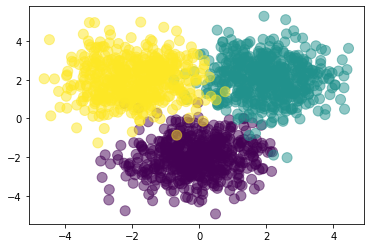

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)

In [9]:
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

In [10]:
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [11]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [12]:
def feedForeward(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1)
    # Z = np.tanh(X.dot(W1) + b1) # tanh
    # Z = np.maximum(X.dot(W1) + b1, 0) # relu
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

In [13]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [14]:
P_Y_given_X = feedForeward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

In [15]:
# verify we chose the correct axis
assert(len(P) == len(Y))
print("Classification rate for randomly chosen weights:", classification_rate(Y, P))

Classification rate for randomly chosen weights: 0.224
